# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


# Overview
- Dataset: [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)
- Rows: ~16,598
- Selected features: 
    1. Genre (categorial)
    2. Platform (categorical)
    3. Year (numerical)
    4. NA_Sales (numerical)
    5. EU_Sales (numerical)
- Target: Global_Sales (numerical)

# Expected Relationships
- Likely strong:
    - NA_Sales and EU_Sales — obviously, partial    contributions to global sales.

- Moderate or interesting:
    - Genre — some genres (e.g., Sports, Shooter, Action) may show notably higher average sales.

    - Platform — some platforms like PS2 or Wii likely outperform others globally.

- Trend-based:
    - Year — you might observe upward or downward sales trends over time (e.g., peak console eras).

- Less likely significant:
    - It's improbable, but Year may be less correlated if older games still sell robustly over time.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('vgsales.csv')

# Display the first few rows of the dataset
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


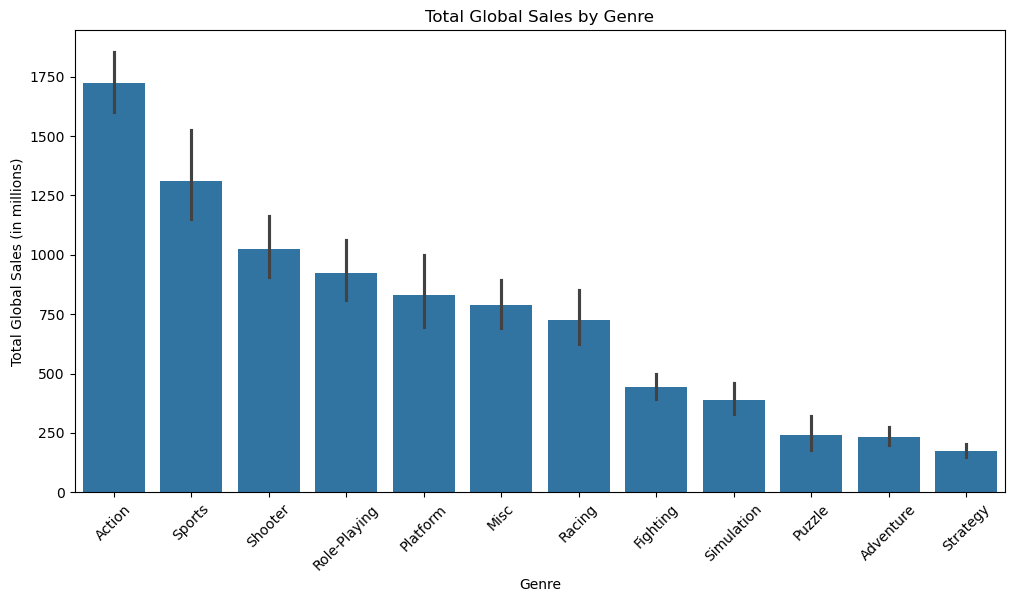

In [5]:
#features and target
features = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target = 'Global_Sales'

#get rid of missing values
df = df[features + [target]].dropna()

# 1. Genre vs Global Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Genre', y='Global_Sales', estimator=sum, order=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('Total Global Sales by Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.show()

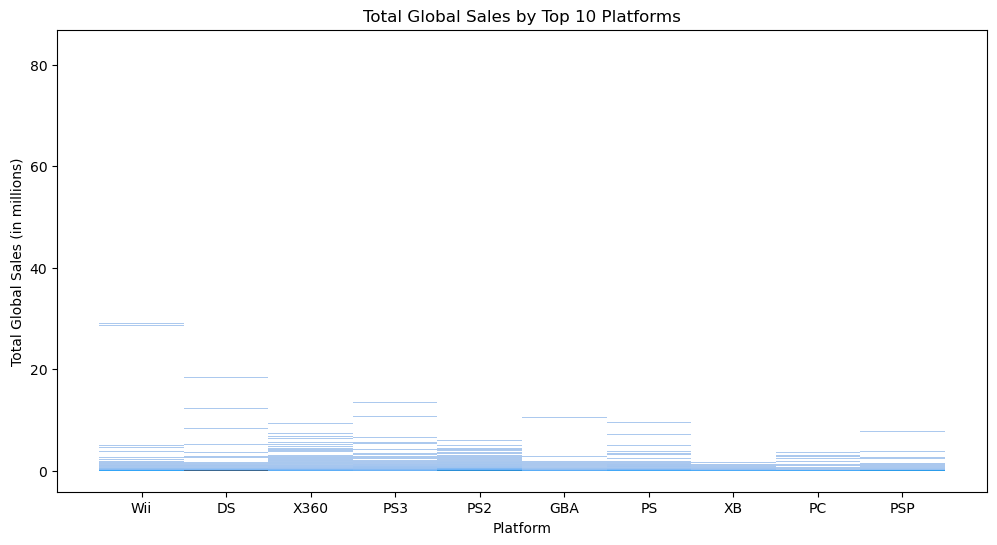

In [34]:
#2. Platform vs Global Sales
plt.figure(figsize=(12, 6))
top_platforms = df['Platform'].value_counts().nlargest(10).index
sns.histplot(data=df[df['Platform'].isin(top_platforms)], x='Platform', y='Global_Sales', multiple='stack', shrink=0.8)
plt.title('Total Global Sales by Top 10 Platforms')
plt.ylabel('Total Global Sales (in millions)')
plt.show()

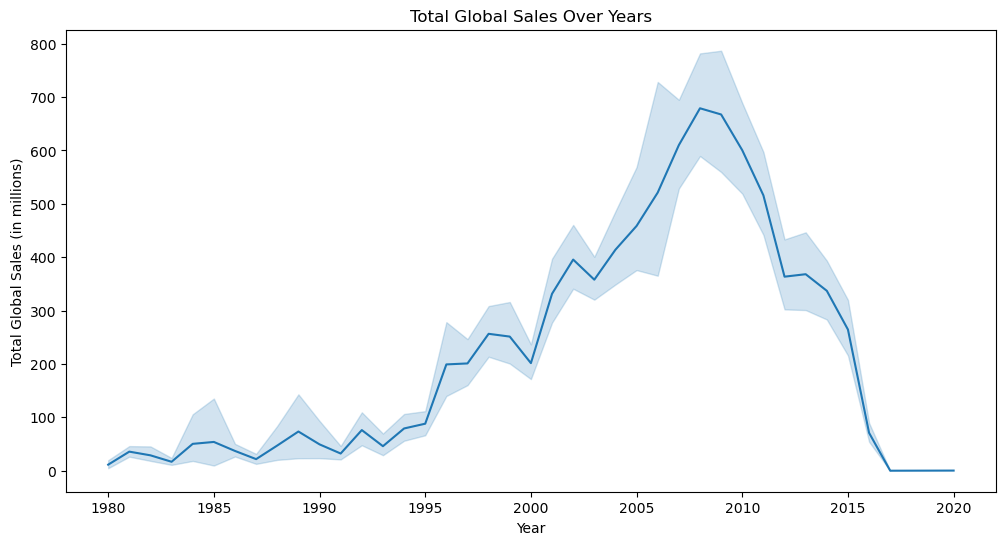

In [11]:
#3. Year vs Global Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Global_Sales', estimator=sum)
plt.title('Total Global Sales Over Years')
plt.ylabel('Total Global Sales (in millions)')
plt.show()

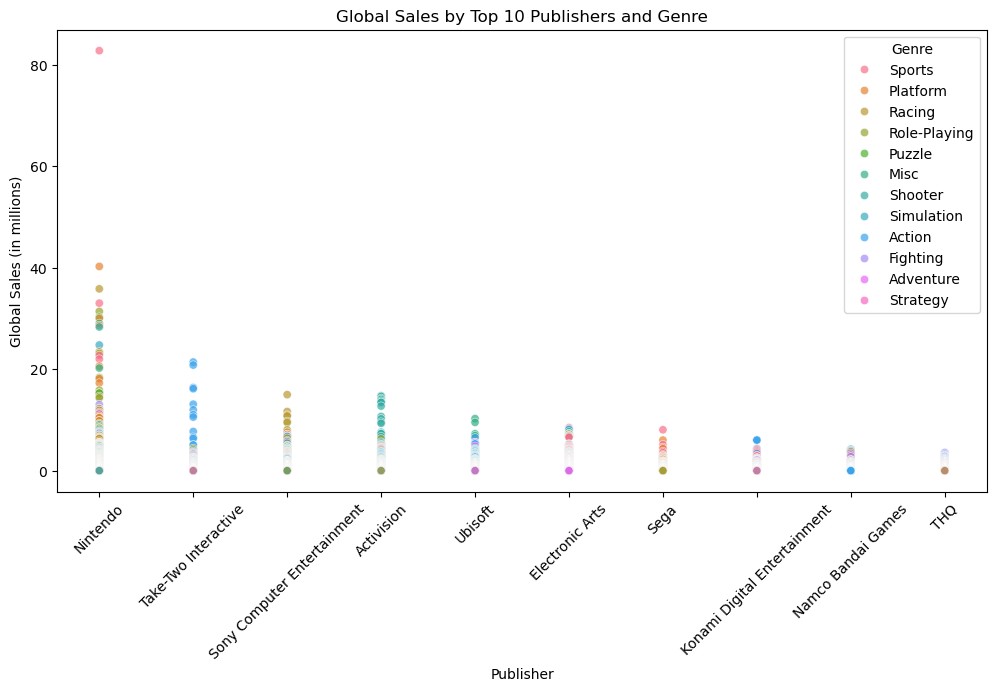

In [14]:
#4. Publisher vs Global Sales
plt.figure(figsize=(12, 6))
top_publishers = df['Publisher'].value_counts().nlargest(10).index
sns.scatterplot(data=df[df['Publisher'].isin(top_publishers)], x='Publisher', y='Global_Sales', hue='Genre', alpha=0.7)
plt.xticks(rotation=45)
plt.title('Global Sales by Top 10 Publishers and Genre')
plt.ylabel('Global Sales (in millions)')
plt.show()

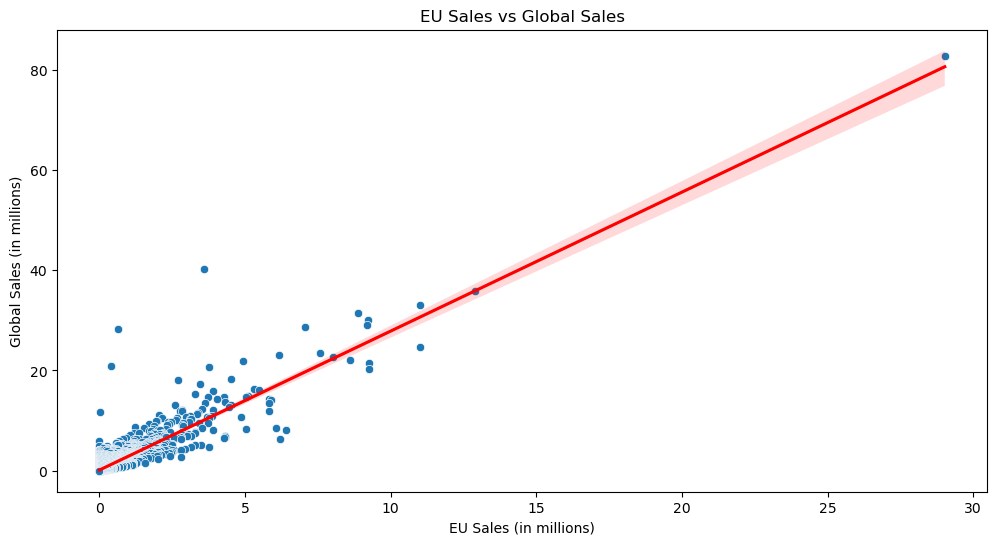

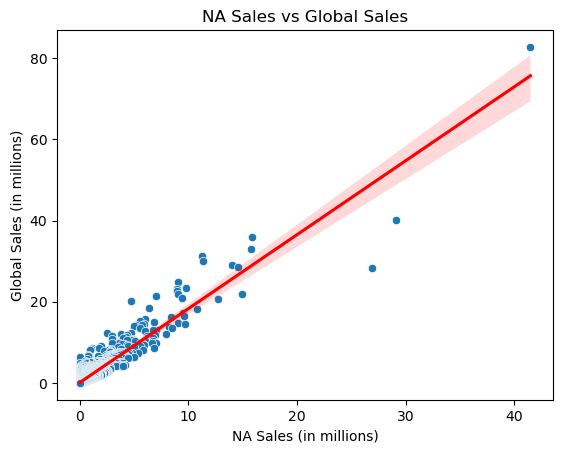

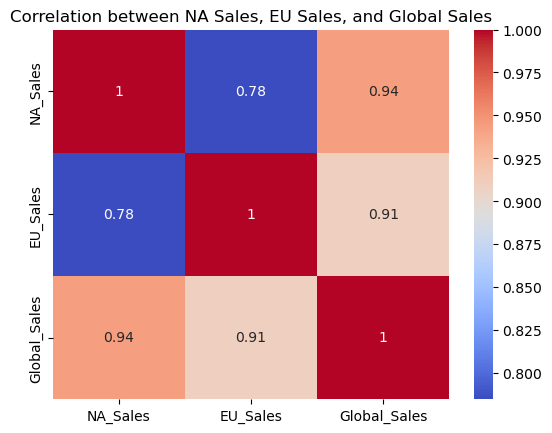

In [28]:
#5. Eu Sales vs Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='EU_Sales', y='Global_Sales', )
sns.regplot(data=df, x='EU_Sales', y='Global_Sales', scatter=False, color='red')
plt.title('EU Sales vs Global Sales')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('EU Sales (in millions)')
plt.show()
#6. Na Sales vs Global Sales
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales')
sns.regplot(data=df, x='NA_Sales', y='Global_Sales', scatter=False, color='red')
plt.title('NA Sales vs Global Sales')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('NA Sales (in millions)')
plt.show()
#7. Na Sales & Eu Sales vs Global Sales
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between NA Sales, EU Sales, and Global Sales')
plt.show()

# Conclusion

In my visulizations, NA_Sales and EU_Sales showed the strongest correlation with Global_Sales, which is logical as they are subsets of the target. Among categorical features, Genre (notably Action, Sports, and Shooter) and Platform (Wii, DS) stood out with markedly higher average global sales. Year of release exhibited a visible pattern—games released in certain years saw peak sales—though the correlation was weaker overall. In summary: genre and platform play significant roles in predicting global video game success, while regional sales serve as strong direct indicators, and the year offers trend context.